# HLA class I supertype classification using hierarchical clustering
Classify HLA class I alleles into supertypes based on binding groove structure similarity

Author: YUe (Shawn) Shen\
Created: July 2022

In [1]:
from src.SupertypeTools import dist_heatmap, SSE, hierarchical_cluster, Tuning_N, triangle2square, cluster_stability
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Peptide binding speficity distances predicted by NetMHCpan4.1
BA_Mat_all = pd.read_csv("Computed_DistMtx/top10_matrix.csv", index_col=0)
BA_Mat_all = triangle2square(BA_Mat_all)

## 1. Clustering performance comparing to previous studies

### 1.1 Calculate Sum of Sequared Errors (SSE)
Reference panel alleles are clustered locus-wise according to structure distance (SD).\
Clustering performance is assessed by the SSE of peptide binding specificity distance (PD).

The PD SSE of clustering from previous studies are calculated and compared to this research.

In [3]:
# Sidney classification of HLA-A supertypes
A_Sidney = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A30_01'],
    ['A29_02'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]

# Doytchinova classification of HLA-B supertypes
A_Doytchinova = [
    ['A01_01','A29_02','A30_01','A30_02','A30_03','A30_04','A32_01','A03_01','A11_01','A31_01','A33_01','A33_03','A66_01','A68_01','A74_01'],
    ['A26_01','A26_02','A26_03','A02_01','A02_02','A02_03','A02_04','A02_05','A02_06','A02_07','A02_14','A02_17','A68_02','A69_01'],
    ['A23_01','A24_02']
]

ASidney_SSE = SSE(BA_Mat_all, A_Sidney)
ADoytchinova_SSE = SSE(BA_Mat_all, A_Doytchinova)

AMat = pd.read_csv("Computed_DistMtx/refpnl_A.csv", index_col=0)
AMat = triangle2square(AMat)
ASSE_struct, ASSE_BA, _, _ = Tuning_N(AMat, 1, 8, BA_Mat_all)

In [4]:
# Sidney
B_Sidney = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
# Doytchinova
B_Doytchinova = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01','B08_01','B14_02','B15_09','B15_10','B15_18','B39_01','B39_09','B73_01','B18_01','B15_02'],
    ['B51_01','B51_02','B51_03','B53_01','B08_02','B27_02','B38_01','B44_02','B44_03','B57_01','B57_02','B58_01','B58_02','B52_01'],
    ['B15_03','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B39_02','B48_01','B37_01','B40_01','B40_02','B40_06','B45_01','B15_16','B15_17','B15_01','B15_12','B15_13','B46_01']
]

BSidney_SSE = SSE(BA_Mat_all, B_Sidney)
BDoytchinova_SSE = SSE(BA_Mat_all, B_Doytchinova)

BMat = pd.read_csv("Computed_DistMtx/refpnl_B.csv", index_col=0)
BMat = triangle2square(BMat)
BSSE_struct, BSSE_BA, _, _ = Tuning_N(BMat, 1, 8, BA_Mat_all)

In [5]:
# Sidney et al. didin't classify HLA-C supertypes
# Doytchinova
C_Doytchinova = [
    ['C01_02','C03_02','C07_02','C08_01','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]
CDoytchinova_SSE = SSE(BA_Mat_all, C_Doytchinova)

CMat = pd.read_csv("Computed_DistMtx/refpnl_C.csv", index_col=0)
CMat = triangle2square(CMat)
CSSE_struct, CSSE_BA, _, _ = Tuning_N(CMat, 1, 8, BA_Mat_all)

### 1.2 PD SSE of random even split and direct clustering based on PD matrices
random even split indicates base line performance, and direct clustering indicates best performance

In [6]:
# Use random clustering as baseline model
import random
import numpy as np

A_ref_alleles = ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01',
'A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01',
'A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01',
'A23_01', 'A24_02']
B_ref_alleles = ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01',
'B08_01','B08_02',
'B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01',
'B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01',
'B15_16','B15_17','B57_01','B57_02','B58_01','B58_02',
'B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
C_ref_alleles = ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04',
'C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
ALL_REF = [A_ref_alleles, B_ref_alleles, C_ref_alleles]

RAND_BA_SSE = []
for ref_alleles in ALL_REF:
    mean_sse = []
    std_sse = []

    for i in range(1, 9):
        n_cluster_sse = []
        for _ in range(5):
            random.shuffle(ref_alleles)
            rand_split = np.array_split(ref_alleles, i)
            # print(len(rand_split), ref_alleles)
            # breakpoint()
            n_cluster_sse.append(SSE(BA_Mat_all, rand_split))

        mean_sse.append(np.mean(n_cluster_sse))
        std_sse.append(np.std(n_cluster_sse))

    RAND_BA_SSE.append((mean_sse, std_sse))

In [7]:
# Clustering of BA matrix directly as best performance
BestBA_SSE = []
for ref_alleles in ALL_REF:

    ref_Mat = BA_Mat_all.loc[ref_alleles, ref_alleles]
    SSE_BA, _, _, _ = Tuning_N(ref_Mat, 1, 8, None)

    BestBA_SSE.append(SSE_BA)

### 1.3 Elbow plot showing clustering performance

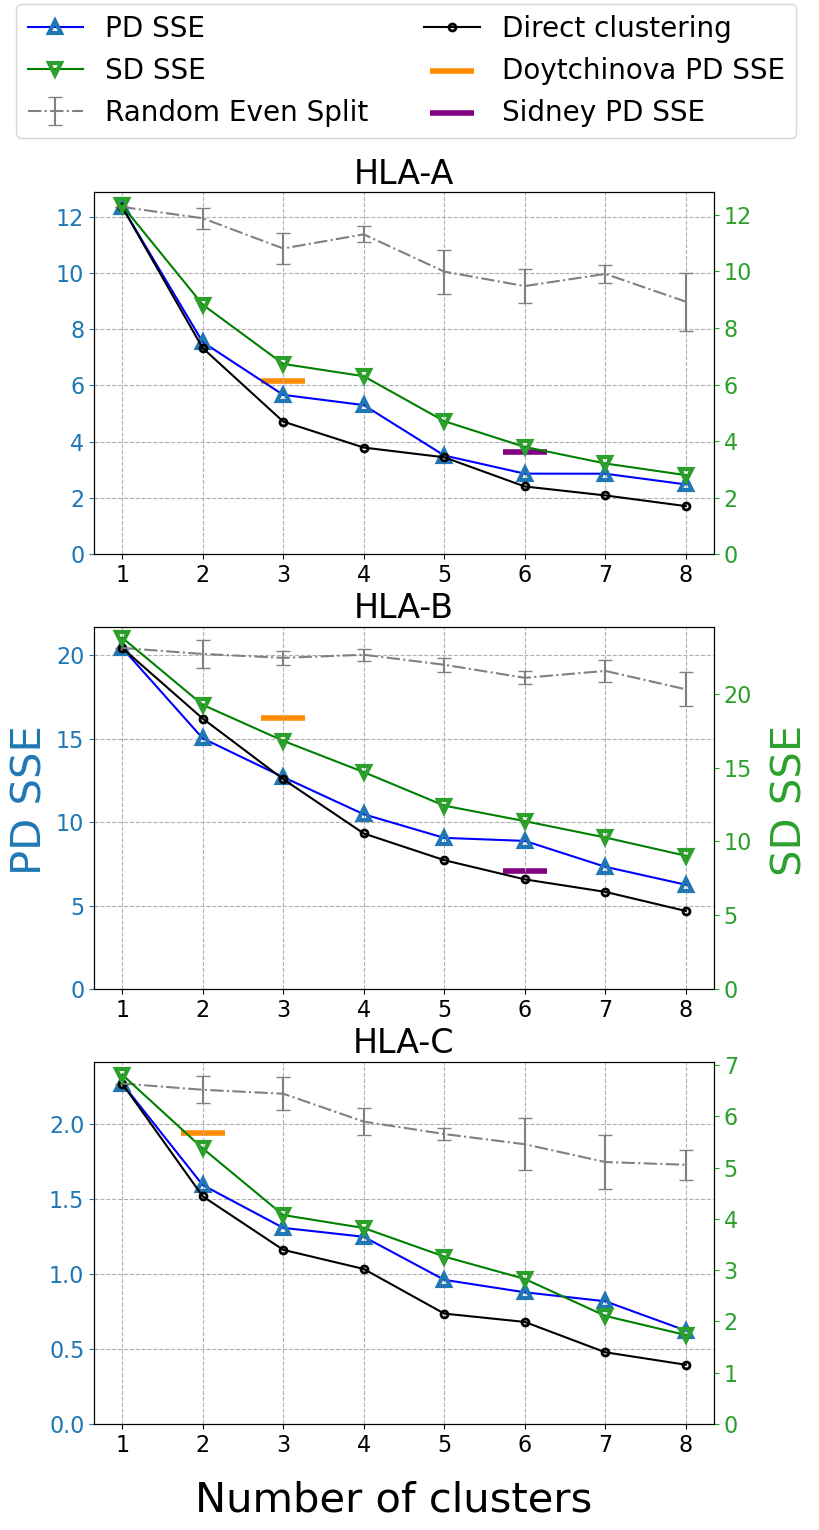

In [14]:
def elbow_subplot(ax1, SSE_Struct, SSE_BA, SSE_rnd, SSE_best):
    ax2 = ax1.twinx()
    xx = range(1, 9)
    # line plots
    line1, = ax1.plot(xx, SSE_BA, c='b', marker='^', mfc='None', mec='tab:blue', ms='8', mew=3, alpha=1, label="Peptide Specificity SSE")
    line2, = ax2.plot(xx, SSE_Struct, c='g', marker='v', mfc='None', mec='tab:green', ms='8', mew=3, alpha=1, label="Structure Distance SSE")

    # random splits
    line3 = ax1.errorbar(xx, SSE_rnd[0], yerr=SSE_rnd[1], alpha=1, ls='-.', capsize=5, color='gray', label="Random Even Split")
    line4, = ax1.plot(xx, SSE_best, c='k', marker='o', mfc='None', mec='k', ms='5', mew=2, alpha=1, label="Direct clustering")

        # ax1.set_xlabel('Number of clusters', fontsize=20)
    ax1.set_xticks(range(1,9,1))
    ax1.tick_params(axis='x', labelsize=16)

    ax1.tick_params(axis='y', colors='tab:blue', labelsize=16)
    ax2.tick_params(axis='y', colors='tab:green', labelsize=16)
    ax1.set_ylim([0,None])
    ax2.set_ylim([0,None])

    ax1.grid(linestyle='--')

    return (line1, line2, line3, line4)

def add_point(ax1, N, SSE_BA, color, label):
    point = ax1.scatter(N, SSE_BA, s=1000, c=color, marker='_', linewidth=4, label=label)
    return point

plt.style.use('default')
fig, axes = plt.subplots(3, 1, figsize=(8,16))

# HLA-A
lines = elbow_subplot(axes[0], ASSE_struct, ASSE_BA, RAND_BA_SSE[0], BestBA_SSE[0])

point1 = add_point(axes[0], 3, ADoytchinova_SSE, 'darkorange', "Doytchinova BS SSE")
point2 = add_point(axes[0], 6, ASidney_SSE, 'purple', "Sidney BS SSE")

axes[0].set_title("HLA-A", fontsize=24)

# HLA-B
elbow_subplot(axes[1], BSSE_struct, BSSE_BA, RAND_BA_SSE[1], BestBA_SSE[1])

add_point(axes[1], 3, BDoytchinova_SSE, 'darkorange', "Doytchinova BS SSE")
add_point(axes[1], 6, BSidney_SSE, 'purple', "Sidney BS SSE")

axes[1].set_title("HLA-B", fontsize=24)

# HLA-C
elbow_subplot(axes[2], CSSE_struct, CSSE_BA, RAND_BA_SSE[2], BestBA_SSE[2])
add_point(axes[2], 2, CDoytchinova_SSE, 'darkorange', "Doytchinova BS SSE")

axes[2].set_title("HLA-C", fontsize=24)

plots = []
labels = []
plots += lines
labels.append("PD SSE")
labels.append("SD SSE")
labels.append("Random Even Split")
labels.append("Direct clustering")

plots.append(point1)
plots.append(point2)
labels.append("Doytchinova PD SSE")
labels.append("Sidney PD SSE")

fig.legend(plots, labels, prop={"size":20}, loc=(0.02,0.91), ncol=2)

fig.supxlabel("Number of clusters", fontsize=30, y=0.05)
fig.supylabel("PD SSE", fontsize=30, c='tab:blue')
fig.text(0.97, 0.5, 'SD SSE', va='center', rotation='vertical', fontsize=30, c='tab:green')

plt.show()

## 2. Cluster All populated HLA I alleles

In [2]:
Mat = pd.read_csv("Computed_DistMtx/HLA-I.csv", index_col=0)
Mat = triangle2square(Mat)

### 2.1 Choose optimized number of clusters using elbow plot and silhouette plot method

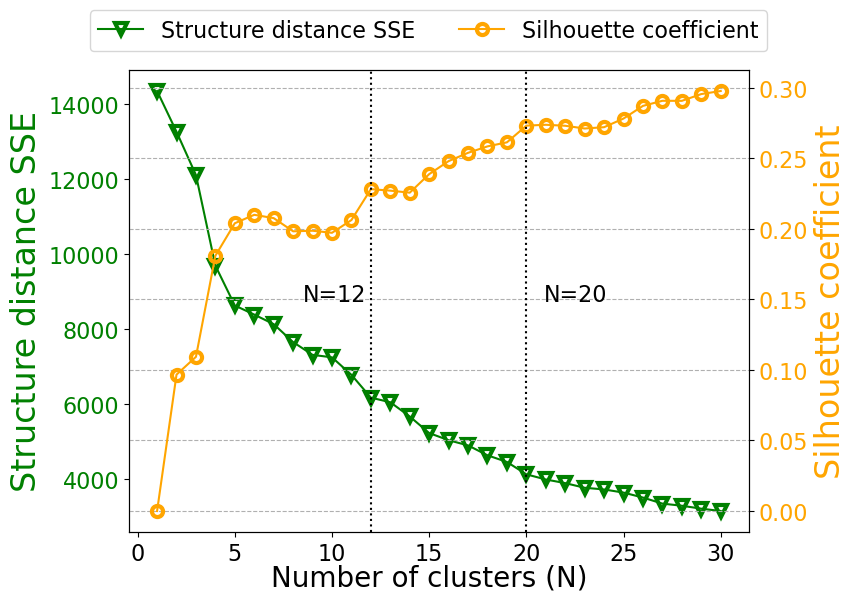

In [27]:
SSE_struct, _, SilhouetteScore, _ = Tuning_N(Mat, 1, 30, ClusterSilhouette=True)
plt.style.use("default")

fig, ax1 = plt.subplots(figsize=(8,6))
xx = range(1, 31)
ax2 = ax1.twinx()

line1, = ax1.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, label="Structure distance SSE")
line2, = ax2.plot(xx, SilhouetteScore, c='orange', marker='o', mfc='None', mec='orange', ms=8, mew=3, label="Silhouette coefficient")

ax1.set_ylabel('Structure distance SSE', color='green', fontsize=24)
ax2.set_ylabel('Silhouette coefficient', color='orange', fontsize=24)

ax1.tick_params(axis='y', labelcolor='green', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelcolor='orange', labelsize=16)

fig.supxlabel('Number of clusters (N)', fontsize=20)
plt.axvline(x=12, c='k', linestyle=':')
plt.annotate('N=12', xy=(0.28, 0.5), xycoords='axes fraction', fontsize=16)
plt.axvline(x=20, c='k', linestyle=':')
plt.annotate('N=20', xy=(0.67, 0.5), xycoords='axes fraction', fontsize=16)

plt.grid(linestyle='--')

fig.legend([line1, line2], ["Structure distance SSE", "Silhouette coefficient"], prop={"size":16}, loc=9, ncol=2)

plt.show()

### 2.2 Clustering of all populated HLA class I alleles in supertype level

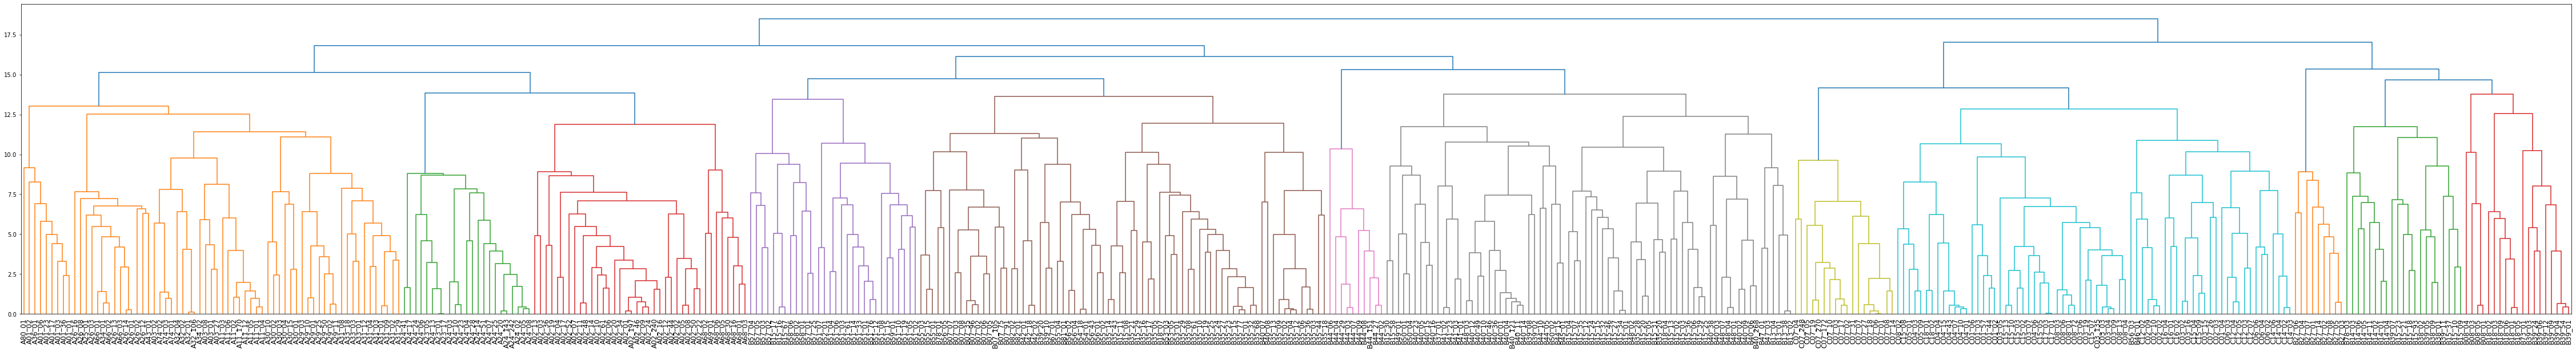

In [3]:
supertype_cluster, _, supertype_centroids = hierarchical_cluster(Mat, N=12, L='complete', color_threshold=13.8, plot_dendro=True, outtree=None)
supertype_stability = cluster_stability(Mat, supertype_cluster)

In [5]:
# cluster centroids and boot strap stability measured by mean Jaccard index
supertype_centroids.to_frame(name='centroids').join(supertype_stability.to_frame(name='stability'))

,centroids,stability
0,B39_54,0.222385
1,B40_11,0.608565
2,A02_24,0.561120
3,B35_01,0.612199
4,C15_05,0.895362
5,B27_03,0.715277
6,B44_02,0.433268
7,A03_02,0.646460
8,B51_76,0.736702
9,B15_10,0.695792


### 2.3 Clustering of all populated HLA class I alleles in subtype level

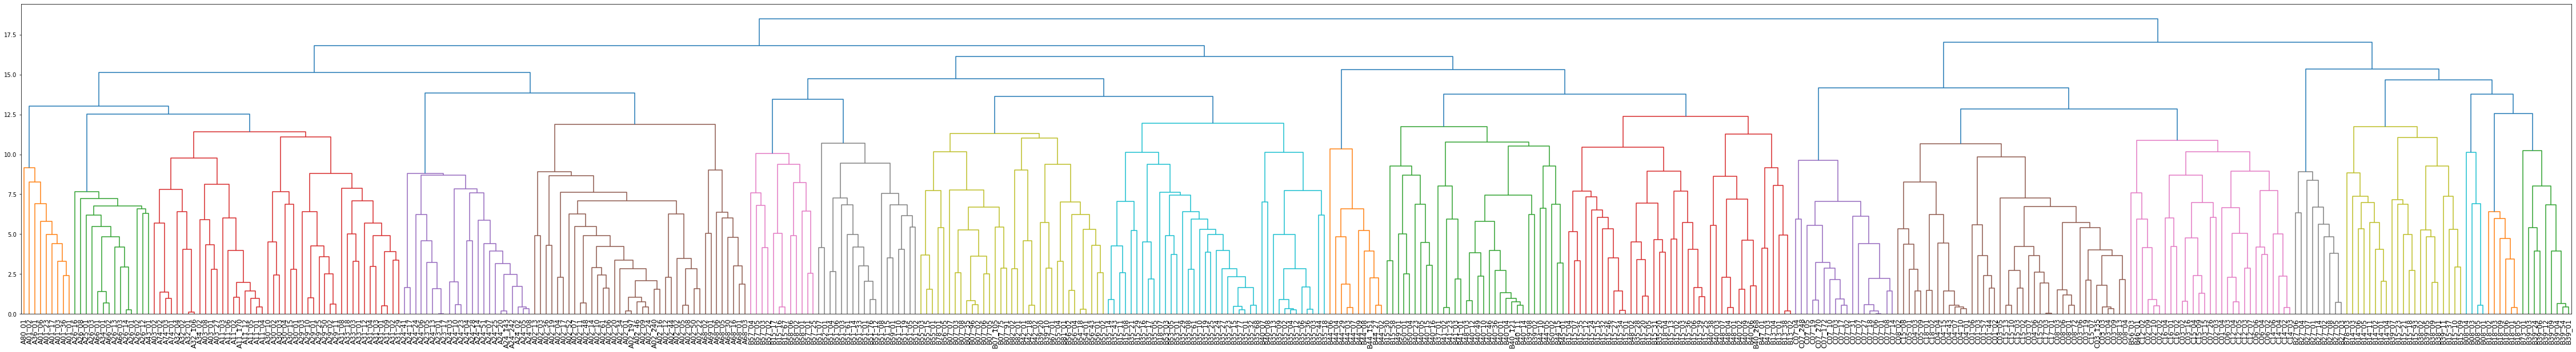

In [6]:
subtype_cluster, subtype_order, subtype_centroids = hierarchical_cluster(Mat, N=20, L='complete', color_threshold=12.4, plot_dendro=True, outtree=None)
subtype_stability = cluster_stability(Mat, subtype_cluster)

In [7]:
subtype_centroids.to_frame(name='centroids').join(subtype_stability.to_frame(name='stability'))

,centroids,stability
0,B15_05,0.538676
1,B35_01,0.720620
2,A02_24,0.814781
3,A31_09,0.678269
4,B15_10,0.723857
5,B08_05,0.660316
6,B40_11,0.678630
7,C02_10,0.785923
8,C15_05,0.894193
9,B51_76,0.905403


### Clustering results of supertype and subtype level

In [58]:
supertype_cluster.to_frame(name='Supertype').join(subtype_cluster.to_frame(name='Subtype')).sort_values(by='Subtype')

,Supertype,Sub-supertype
B13_04,1,0
B48_04,1,0
B15_05,1,0
B15_01,1,0
B15_35,1,0
...,...,...
A66_01,7,19
A26_16,7,19
A26_08,7,19
A26_14,7,19


### 2.4 Heatmap of structure distance matrix of populated HLA class I alleles, with subtype divide

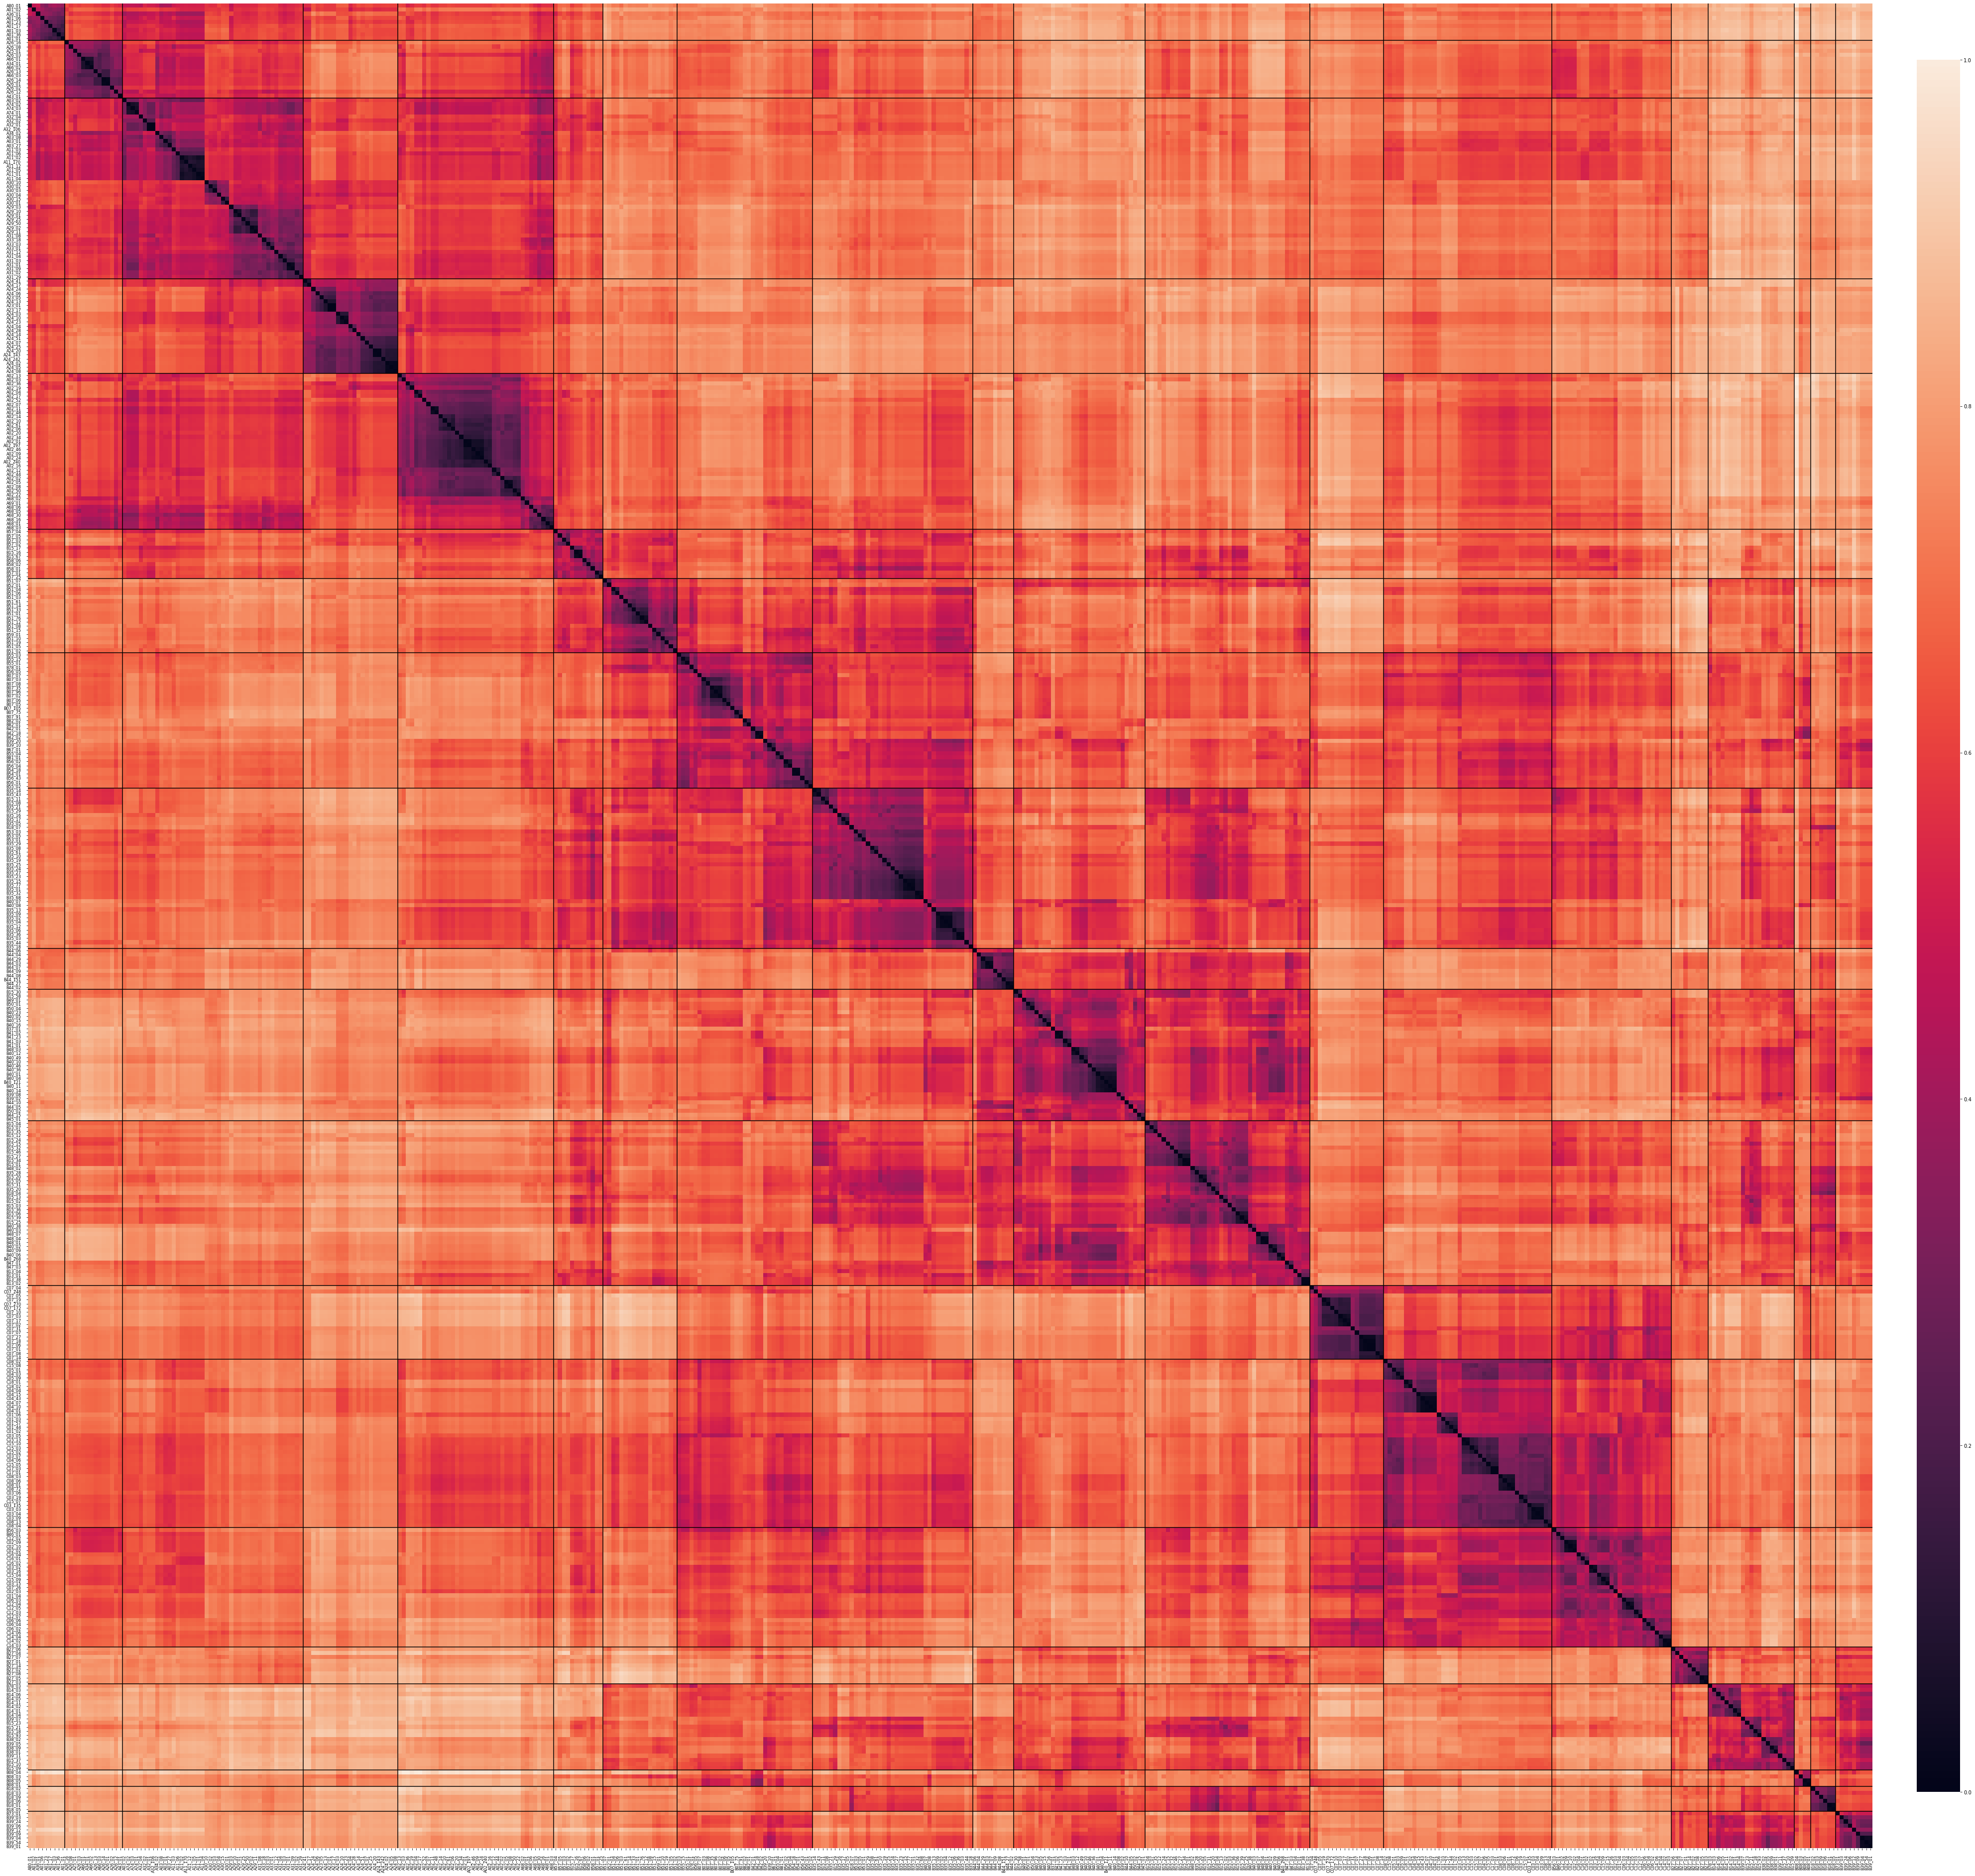

In [8]:
# extract the allele order in sub-supertype dendrogram
name_order = Mat.index[subtype_order].to_list()
group_dict = subtype_cluster.to_dict()

full_order = []
temp_group = None
last_group = -1
for name in name_order:
    if group_dict[name] != last_group:
        temp_group = []
        full_order.append(temp_group)

    temp_group.append(name)
    last_group = group_dict[name]

dist_heatmap(Mat, order=full_order, size=(80,80), line=True, shrink=0.8, aspect=40, pad=0.02, label=True)